In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df=pd.read_csv(r"C:\Documents\OneDrive\Desktop\Data_Science notes\Titanic-Dataset.csv")
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print("\n Dataset Info:")
print(df.info())


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
print("\n Missing values:\n",df.isnull().sum())
print("\n Statistics:\n",df.describe())


 Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208 

In [7]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [8]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
df['Cabin']=df['Cabin'].fillna('Unknown')

In [10]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked_Q     0
Embarked_S     0
dtype: int64

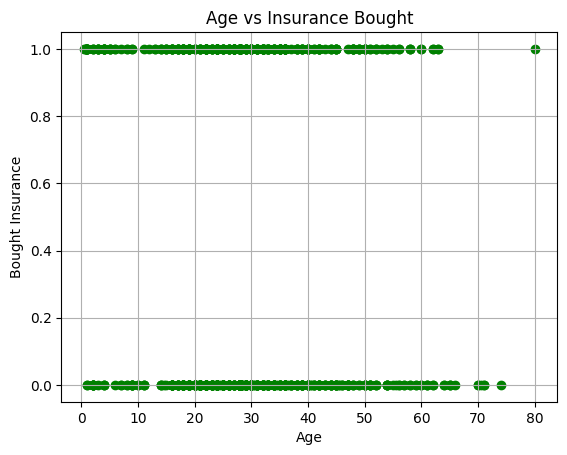

In [12]:
plt.scatter(df['Age'],df['Survived'],color='green')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')
plt.title('Age vs Insurance Bought')
plt.grid(True)
plt.show()

In [13]:
X=df[['Age','Pclass','SibSp','Parch','Fare','Embarked_Q','Embarked_S']]
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [16]:
print(model.coef_)
print(model.intercept_)

[[-0.40771631 -0.73546553 -0.27270985  0.20888157  0.17473521  0.06575285
  -0.20658235]]
[-0.56309215]


In [17]:
y_pred=model.predict(X_test)
print("Predicted:",y_pred.tolist())
print("Actual:",y_test.tolist())

Predicted: [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
Actual: [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0

In [18]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

Accuracy: 0.7206703910614525
Confusion Matrix:
 [[92 13]
 [37 37]]


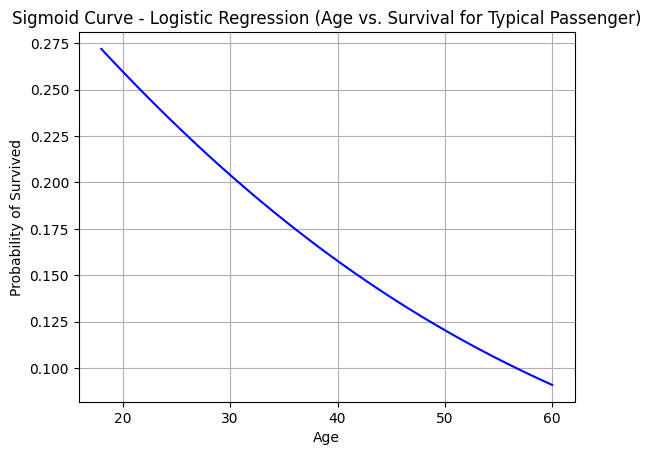

In [19]:
ages_for_plot = np.linspace(18, 60, 100)

# Calculate typical values for other features using the median/mode from the original df
typical_pclass = df['Pclass'].median()
typical_sibsp = df['SibSp'].median()
typical_parch = df['Parch'].median()
typical_fare = df['Fare'].median()
typical_embarked_q = df['Embarked_Q'].mode()[0]
typical_embarked_s = df['Embarked_S'].mode()[0]

# Create a DataFrame for prediction input, ensuring correct column order
plot_input_data = {
    'Age': ages_for_plot,
    'Pclass': np.full(ages_for_plot.shape, typical_pclass),
    'SibSp': np.full(ages_for_plot.shape, typical_sibsp),
    'Parch': np.full(ages_for_plot.shape, typical_parch),
    'Fare': np.full(ages_for_plot.shape, typical_fare),
    'Embarked_Q': np.full(ages_for_plot.shape, typical_embarked_q),
    'Embarked_S': np.full(ages_for_plot.shape, typical_embarked_s)
}
plot_df = pd.DataFrame(plot_input_data)

# Scale the input data using the trained scaler
plot_df_scaled = scaler.transform(plot_df)

# Predict probabilities
probs = model.predict_proba(plot_df_scaled)[:, 1]

plt.plot(ages_for_plot, probs, color='blue')
plt.xlabel('Age')
plt.ylabel('Probability of Survived')
plt.title('Sigmoid Curve - Logistic Regression (Age vs. Survival for Typical Passenger)')
plt.grid(True)
plt.show()

In [25]:
print(ages_for_plot)

[18.         18.42424242 18.84848485 19.27272727 19.6969697  20.12121212
 20.54545455 20.96969697 21.39393939 21.81818182 22.24242424 22.66666667
 23.09090909 23.51515152 23.93939394 24.36363636 24.78787879 25.21212121
 25.63636364 26.06060606 26.48484848 26.90909091 27.33333333 27.75757576
 28.18181818 28.60606061 29.03030303 29.45454545 29.87878788 30.3030303
 30.72727273 31.15151515 31.57575758 32.         32.42424242 32.84848485
 33.27272727 33.6969697  34.12121212 34.54545455 34.96969697 35.39393939
 35.81818182 36.24242424 36.66666667 37.09090909 37.51515152 37.93939394
 38.36363636 38.78787879 39.21212121 39.63636364 40.06060606 40.48484848
 40.90909091 41.33333333 41.75757576 42.18181818 42.60606061 43.03030303
 43.45454545 43.87878788 44.3030303  44.72727273 45.15151515 45.57575758
 46.         46.42424242 46.84848485 47.27272727 47.6969697  48.12121212
 48.54545455 48.96969697 49.39393939 49.81818182 50.24242424 50.66666667
 51.09090909 51.51515152 51.93939394 52.36363636 52.

In [26]:
print(probs)

[0.27195366 0.26932702 0.26671646 0.26412206 0.2615439  0.25898204
 0.25643656 0.25390753 0.25139501 0.24889906 0.24641973 0.24395707
 0.24151114 0.23908198 0.23666963 0.23427412 0.23189549 0.22953378
 0.227189   0.22486119 0.22255036 0.22025653 0.21797971 0.21571991
 0.21347715 0.21125143 0.20904274 0.20685109 0.20467647 0.20251888
 0.2003783  0.19825472 0.19614812 0.19405849 0.19198581 0.18993004
 0.18789117 0.18586917 0.183864   0.18187563 0.17990402 0.17794913
 0.17601093 0.17408937 0.1721844  0.17029598 0.16842406 0.16656859
 0.1647295  0.16290675 0.16110028 0.15931003 0.15753594 0.15577795
 0.15403598 0.15230998 0.15059988 0.1489056  0.14722708 0.14556425
 0.14391703 0.14228534 0.14066912 0.13906827 0.13748273 0.13591242
 0.13435724 0.13281713 0.13129199 0.12978174 0.1282863  0.12680558
 0.12533949 0.12388795 0.12245087 0.12102815 0.11961971 0.11822546
 0.1168453  0.11547914 0.11412689 0.11278846 0.11146375 0.11015266
 0.10885511 0.107571   0.10630022 0.10504269 0.10379831 0.1025

In [27]:
# Define the single input data point for age 40, using typical values for other features
predict_age = 40
single_person_data = {
    'Age': [predict_age],
    'Pclass': [typical_pclass],
    'SibSp': [typical_sibsp],
    'Parch': [typical_parch],
    'Fare': [typical_fare],
    'Embarked_Q': [typical_embarked_q],
    'Embarked_S': [typical_embarked_s]
}
single_person_df = pd.DataFrame(single_person_data)

# Scale the single input data point
single_person_scaled = scaler.transform(single_person_df)

print("Survived:")
print("Prediction (0=no,1=yes):",model.predict(single_person_scaled)[0])
print("Probability:",model.predict_proba(single_person_scaled)[0][1])

Survived:
Prediction (0=no,1=yes): 0
Probability: 0.15778839575462086


In [28]:
# This cell is attempting to predict with only one feature.
# The model expects 7 features, just like it was trained.
# We need to provide all features and scale them.

# Using the previously defined typical values for other features
predict_age = 40
single_person_data = {
    'Age': [predict_age],
    'Pclass': [typical_pclass],
    'SibSp': [typical_sibsp],
    'Parch': [typical_parch],
    'Fare': [typical_fare],
    'Embarked_Q': [typical_embarked_q],
    'Embarked_S': [typical_embarked_s]
}
single_person_df_corrected = pd.DataFrame(single_person_data)

# Scale the single input data point using the fitted scaler
single_person_scaled_corrected = scaler.transform(single_person_df_corrected)

# Now predict with the correctly structured and scaled input
a = model.predict_proba(single_person_scaled_corrected)
print(a.shape)
print(a)

(1, 2)
[[0.8422116 0.1577884]]


c:\Users\dhanu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


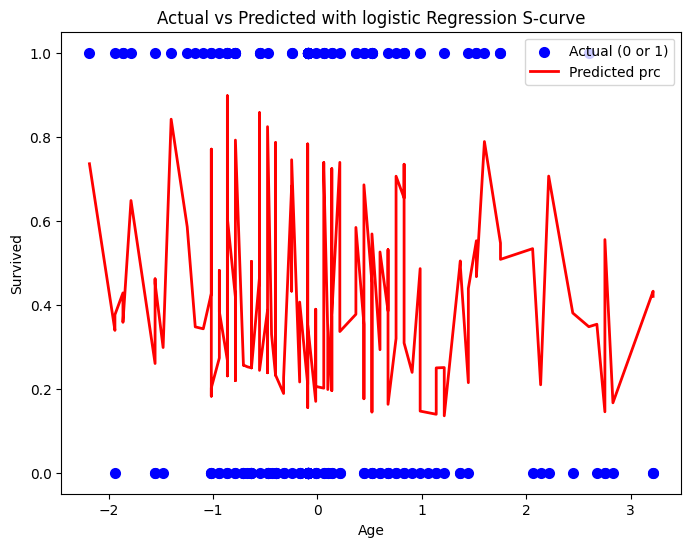

In [29]:
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Get the positional indices that would sort X_test_df by 'Age'
sorted_indices_pos = X_test_df['Age'].argsort()

# Apply this positional sorting to both the scaled X_test_df and the original y_test
X_test_sorted_scaled = X_test_df.iloc[sorted_indices_pos]
y_test_sorted_by_X_age = y_test.iloc[sorted_indices_pos]

y_pred_sorted = model.predict_proba(X_test_sorted_scaled)[:,1]

plt.figure(figsize=(8,6))
plt.scatter(X_test_sorted_scaled['Age'],y_test_sorted_by_X_age,color='blue',linewidth=2,label='Actual (0 or 1)')
plt.plot(X_test_sorted_scaled['Age'],y_pred_sorted,color='red',linewidth=2,label='Predicted prc')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Actual vs Predicted with logistic Regression S-curve')
plt.legend()
plt.show()

In [31]:
import pickle 
with open("Titanic.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Titanic model saved as Titanic.pkl")


✅ Titanic model saved as Titanic.pkl
